In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
results = pd.read_csv('C:/Users/amand/OneDrive/Documents/Power BI Practice/Formula 1 Project/results.csv') 
races = pd.read_csv('C:/Users/amand/OneDrive/Documents/Power BI Practice/Formula 1 Project/races.csv')
drivers = pd.read_csv('C:/Users/amand/OneDrive/Documents/Power BI Practice/Formula 1 Project/drivers.csv') 
constructors = pd.read_csv('C:/Users/amand/OneDrive/Documents/Power BI Practice/Formula 1 Project/constructors.csv') 

In [5]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
df=pd.merge(results,races[['raceId', 'year', 'name', 'round']], on = 'raceId', how= 'left')
df=pd.merge(df,drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how= 'left')
df=pd.merge(df,constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how= 'left')

In [10]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [11]:
for k in df.columns:
    print(k)

resultId
raceId
driverId
constructorId
number
grid
position
positionText
positionOrder
points
laps
time
milliseconds
fastestLap
rank
fastestLapTime
fastestLapSpeed
statusId
year
name_x
round
driverRef
nationality_x
name_y
nationality_y


In [12]:
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId','resultId','raceId','driverId','constructorId'], axis =1 , inplace= True)

In [13]:
df.rename(columns = {'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality', 'name_y':'constructor_name', 'nationality_y':'constructor_nationality', 'driverRef':'driver'}, inplace= True)

In [14]:
n=0
for k in df.columns:
    print(k)
    n+=1
print(n)

grid
positionOrder
points
time
milliseconds
fastest_lap_rank
fastestLapTime
fastestLapSpeed
year
gp_name
round
driver
driver_nationality
constructor_name
constructor_nationality
15


In [15]:
df=df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastest_lap_rank','fastestLapTime','fastestLapSpeed',
        'driver_nationality','constructor_nationality']]

In [16]:
n=0
for k in df.columns:
    print(k)
    n+=1
print(n)
df.head()

year
gp_name
round
driver
constructor_name
grid
positionOrder
points
time
milliseconds
fastest_lap_rank
fastestLapTime
fastestLapSpeed
driver_nationality
constructor_nationality
15


,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [17]:
df.loc[df['year']==2019]

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
24197,2019,Australian Grand Prix,1,bottas,Mercedes,2,1,26.0,1:25:27.325,5127325,1,1:25.580,223.075,Finnish,German
24198,2019,Australian Grand Prix,1,hamilton,Mercedes,1,2,18.0,+20.886,5148211,2,1:26.057,221.839,British,German
24199,2019,Australian Grand Prix,1,max_verstappen,Red Bull,4,3,15.0,+22.520,5149845,3,1:26.256,221.327,Dutch,Austrian
24200,2019,Australian Grand Prix,1,vettel,Ferrari,3,4,12.0,+57.109,5184434,8,1:27.954,217.054,German,Italian
24201,2019,Australian Grand Prix,1,leclerc,Ferrari,5,5,10.0,+58.203,5185528,4,1:26.926,219.621,Monegasque,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,2019,Abu Dhabi Grand Prix,21,giovinazzi,Alfa Romeo,16,16,0.0,\N,\N,15,1:43.256,193.639,Italian,Swiss
24617,2019,Abu Dhabi Grand Prix,21,russell,Williams,18,17,0.0,\N,\N,13,1:43.074,193.981,British,British
24618,2019,Abu Dhabi Grand Prix,21,gasly,Toro Rosso,11,18,0.0,\N,\N,10,1:42.414,195.231,French,Italian
24619,2019,Abu Dhabi Grand Prix,21,kubica,Williams,19,19,0.0,\N,\N,20,1:44.500,191.333,Polish,British


In [18]:
df=df[df['year']!=2019]

In [19]:
df.loc[df['year']==2019]

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality


In [20]:
df = df.sort_values(by =['year','round','positionOrder'],ascending=[False,True,True])

In [21]:
df.time.replace('\\N',np.nan,inplace= True)
df.milliseconds.replace('\\N',np.nan,inplace= True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace= True)
df.fastestLapTime.replace('\\N',np.nan,inplace= True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace= True)

In [22]:
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)
df.fastest_lap_rank=df.fastest_lap_rank.astype(float)
df.milliseconds=df.milliseconds.astype(float)

In [23]:
df

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American


In [26]:
print(df.shape)

(25420, 15)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25420 non-null  int64  
 1   gp_name                  25420 non-null  object 
 2   round                    25420 non-null  int64  
 3   driver                   25420 non-null  object 
 4   constructor_name         25420 non-null  object 
 5   grid                     25420 non-null  int64  
 6   positionOrder            25420 non-null  int64  
 7   points                   25420 non-null  float64
 8   time                     6892 non-null   object 
 9   milliseconds             6891 non-null   float64
 10  fastest_lap_rank         7171 non-null   float64
 11  fastestLapTime           6963 non-null   object 
 12  fastestLapSpeed          6963 non-null   float64
 13  driver_nationality       25420 non-null  object 
 14  constructor_nationalit

In [28]:
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


In [29]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

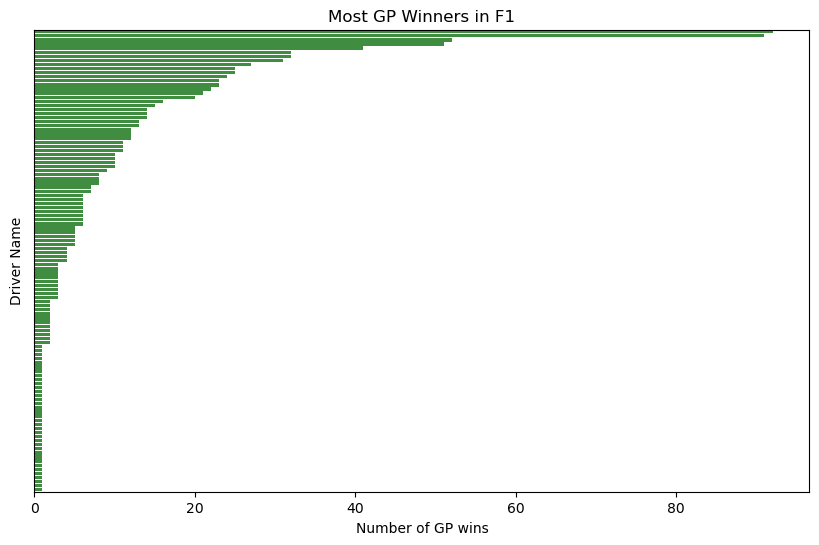

In [34]:
driver_winner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot(data = driver_winner,y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [36]:
top10drivers=driver_winner.head(10)
top10drivers

,driver,positionOrder
0,hamilton,92
1,michael_schumacher,91
2,vettel,52
3,prost,51
4,senna,41
5,alonso,32
6,max_verstappen,32
7,mansell,31
8,stewart,27
9,clark,25


Text(0.5, 0, 'Number of GP wins')

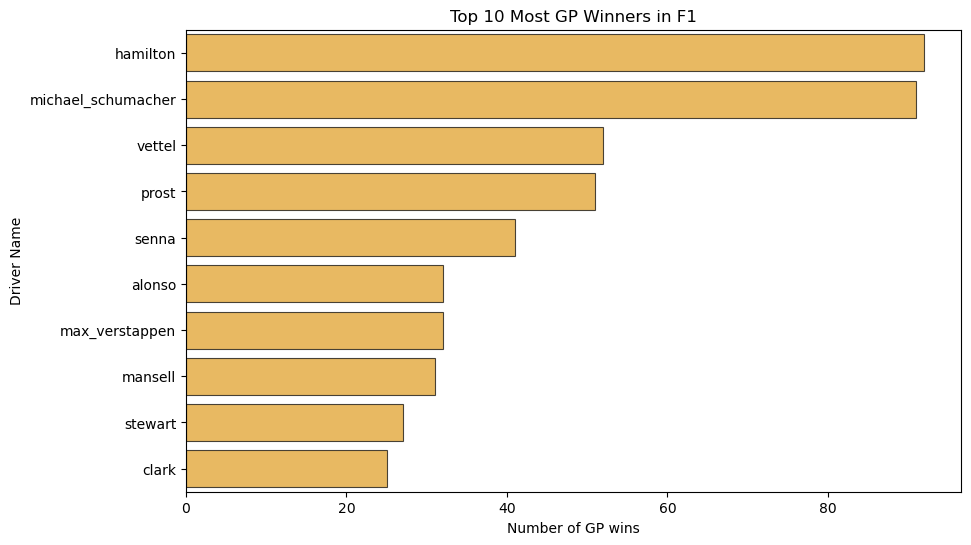

In [53]:
#top 10 drivers plot

sb.barplot(data=top10drivers,y='driver',x='positionOrder',color='orange',alpha=0.7,linewidth=0.8,edgecolor='black')
plt.title('Top 10 Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

([], [])

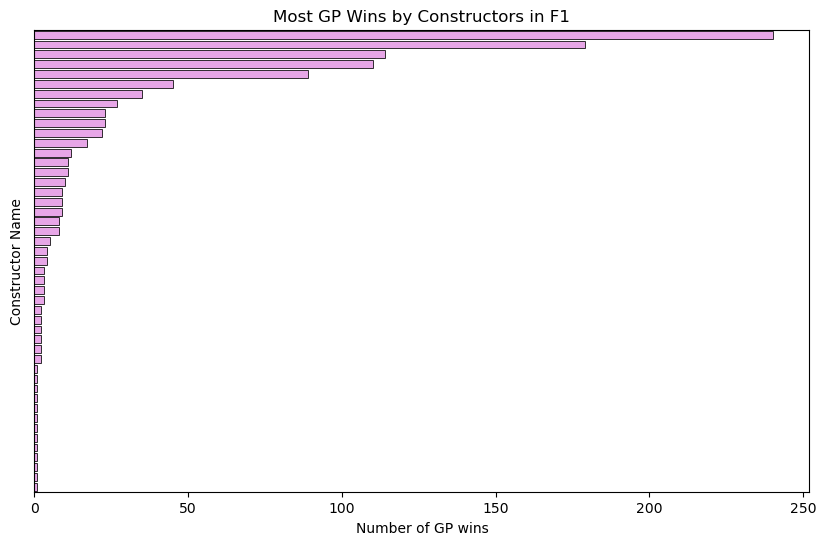

In [61]:
constructor_winner=df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot(data = constructor_winner,y='constructor_name',x='positionOrder',color='violet',alpha=0.8, linewidth=0.7,edgecolor='black')
plt.title('Most GP Wins by Constructors in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [64]:
top10constructors=constructor_winner.head(10)
top10constructors

,constructor_name,positionOrder
0,Ferrari,240
1,McLaren,179
2,Williams,114
3,Mercedes,110
4,Red Bull,89
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


Text(0.5, 0, 'Number of GP wins')

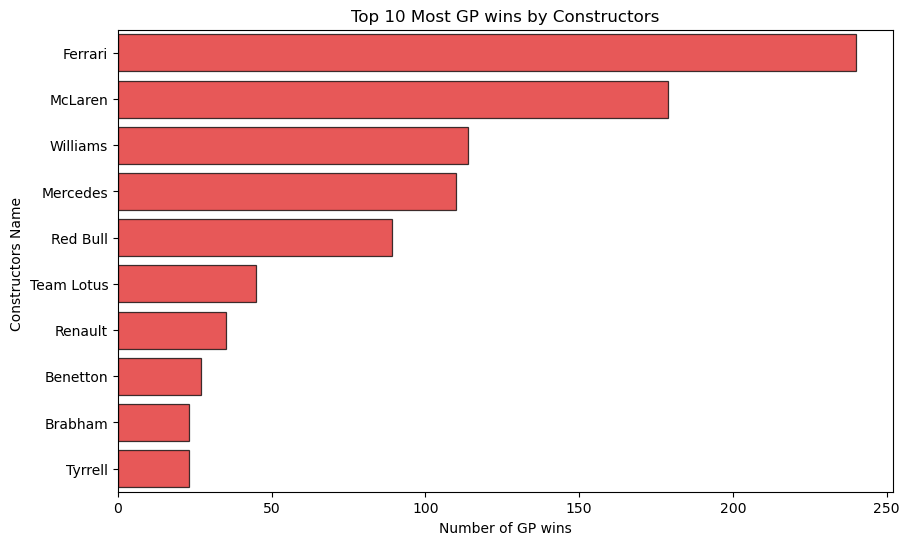

In [72]:
#barplot of top 10 constructors

sb.barplot (data = top10constructors, y = 'constructor_name', x = 'positionOrder',
         color = 'red', alpha = 0.75, linewidth=.9, edgecolor="black")
plt. title( 'Top 10 Most GP wins by Constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')